In [1]:
!pip install ipympl --quiet
!git clone https://github.com/bjam24/krs-web-scraper.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
Cloning into 'krs-web-scraper'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 73 (delta 8), reused 18 (delta 5), pack-reused 44
Receiving objects: 100% (73/73), 11.37 MiB | 14.62 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
# uncomment to enable interactive plots


%matplotlib widget

from google.colab import output
output.enable_custom_widget_manager()

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

## Data import

In [3]:
all_files = glob.glob(os.path.join("/content/krs-web-scraper/data" , "*.csv"))

df = None
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# df = li[1]

# data cleaning
# for column in df.columns:
#     df[column] = df[column].str.strip()
#     df[column] = df[column].str.replace('"', "")
#     df[column] = df[column].str.replace("'", "")
#     df[column] = df[column].str.strip()


In [4]:
df

KRS                                   OrganizationName  \
0       75001                 "SIECHNICKI KLUB KYOKUSHIN KARATE"   
1       75001                 "SIECHNICKI KLUB KYOKUSHIN KARATE"   
2       75001                 "SIECHNICKI KLUB KYOKUSHIN KARATE"   
3       75001                 "SIECHNICKI KLUB KYOKUSHIN KARATE"   
4       75001                 "SIECHNICKI KLUB KYOKUSHIN KARATE"   
...       ...                                                ...   
366525  74998  "SAMORZĄDNY NIEZALEŻNY ZWIĄZEK ZAWODOWY PRACOW...   
366526  74998  "SAMORZĄDNY NIEZALEŻNY ZWIĄZEK ZAWODOWY PRACOW...   
366527  74998  "SAMORZĄDNY NIEZALEŻNY ZWIĄZEK ZAWODOWY PRACOW...   
366528  74998  "SAMORZĄDNY NIEZALEŻNY ZWIĄZEK ZAWODOWY PRACOW...   
366529  74998  "SAMORZĄDNY NIEZALEŻNY ZWIĄZEK ZAWODOWY PRACOW...   

                               LegalForm      Representatives  \
0       stowarzyszenie kultury fizycznej    Marcin Kułakowski   
1       stowarzyszenie kultury fizycznej  Sylwester Kowalczyk   
2       stowarzyszenie kultury fizycznej    Michał Jakubowski   
3       stowarzyszenie kultury fizycznej        Leszek Szuber   
4       stowarzyszenie kultury fizycznej        Artur Chądzel   
...                                  ...                  ...   
366525                  związek zawodowy     Piotr Szydłowski   
366526                  związek zawodowy   Janusz Jędrzejczak   
366527                  związek zawodowy   Przemysław Kubicki   
366528                  związek zawodowy   Karolina Ratajczak   
366529                  związek zawodowy    Krystyna Wielgosz   

        RepresentativesID                             ConnectedOrganizations  
0                  988493  'PRINCEPS WROCŁAW KLUB KARATE KYOKUSHIN': '577...  
1                  923760  'MIEJSKI KLUB SPORTOWY "ŚLĘŻA" SOBÓTKA': '4306...  
2                  163010                                                NaN  
3                 1280958  'PRINCEPS WROCŁAW KLUB KARATE KYOKUSHIN': '577...  
4                 1280959                                                NaN  
...                   ...                                                ...  
366525            3154234                                                NaN  
366526            1532356                                                NaN  
366527            1404709                                                NaN  
366528            1280957                                                NaN  
366529             981223                                                NaN  

[366530 rows x 6 columns]

## Company - person graph

In [50]:
G = nx.Graph()
person_color = 'red'
company_color = 'blue'

In [51]:
import re

def add_company_from_row(graph, row):
  krs_num = int(row[0])
  name = row[1]
  legal_form = row[2]
  if not graph.has_node(krs_num):
    graph.add_node(krs_num, name=name, legal_form=legal_form, color=company_color)

  return krs_num

def add_person_from_row(graph, row):
  person_id = "P" + str(row[4])
  name = row[3]
  if not graph.has_node(person_id):
    graph.add_node(person_id, color=person_color, name=name)

  return person_id

def add_relationship(graph, node1, node2):
  if not graph.has_edge(node1, node2):
    graph.add_edge(node1, node2)

def add_connected_org(graph, person_id, row):
  connected_org = row[5]
  if pd.isna(connected_org):
    return

  pattern = r"'(.*?)': '(\d*?)'"

  # Znajdź wszystkie dopasowania
  matches = re.findall(pattern, connected_org)

  # Utwórz słownik na podstawie dopasowań
  result = {match[0]: int(match[1]) for match in matches}
  # print(result)
  for name, company_id in result.items():
    if not graph.has_node(company_id):
      graph.add_node(company_id, name=name, legal_form=None, color=company_color)

    add_relationship(graph, company_id, person_id)

In [52]:
for index, row in df.iterrows():
    company_id = add_company_from_row(G, row)
    person_id = add_person_from_row(G,row)

    add_relationship(G, company_id, person_id)

    add_connected_org(G, person_id, row)

In [ ]:
# plt.figure(figsize=(10, 10))
# # pos = nx.spring_layout(G)  # Ustalenie układu wierzchołków
# colors = [G.nodes[node]['color'] for node in G.nodes()]
# nx.draw(G, with_labels=True, font_size=10, node_color=colors, font_weight='bold')
# plt.title("Graf firm i powiązanych osób")
# plt.show()

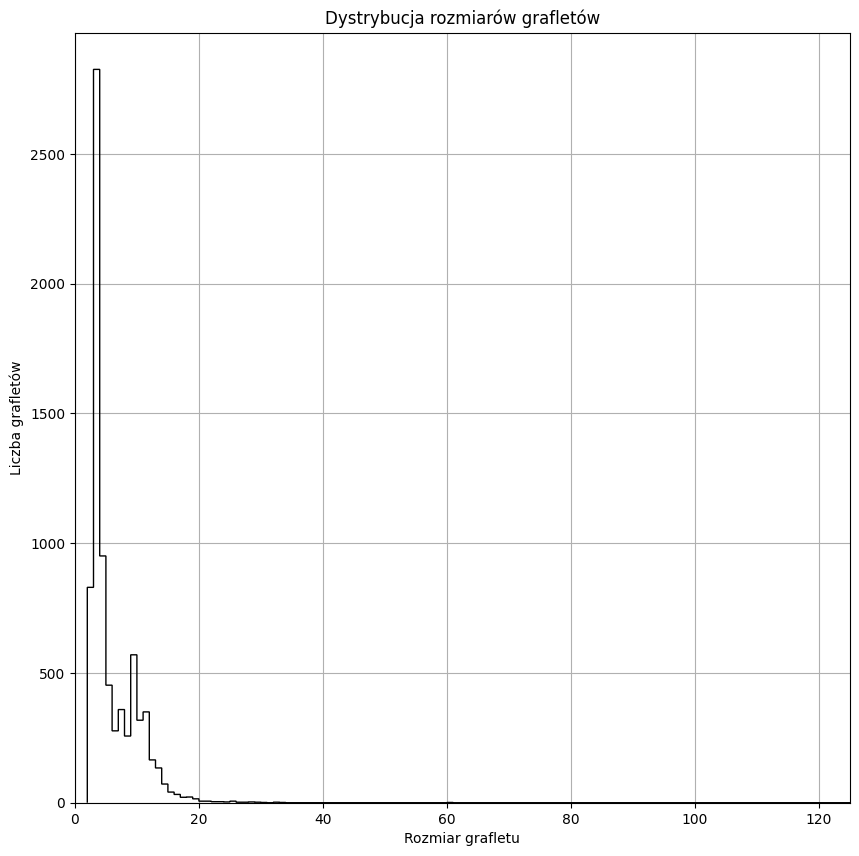

108779


In [45]:
# Funkcja do zliczania rozmiarów grafletów

# Zliczanie rozmiarów grafletów
graphlet_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

# Tworzenie histogramu
plt.figure(figsize=(10, 10))
# counts, bins = np.histogram(graphlet_sizes[100:])
# plt.hist(counts, bins)
plt.hist(graphlet_sizes, bins=range(min(graphlet_sizes), max(graphlet_sizes) + 1, 1), edgecolor='black', histtype='step')
plt.xlabel('Rozmiar grafletu')
plt.ylabel('Liczba grafletów')
plt.title('Dystrybucja rozmiarów grafletów')
plt.xlim((0, 125))
plt.grid(True)
plt.show()
print(max(graphlet_sizes))

In [54]:
num_subgraphs = nx.number_connected_components(G)
print('Number of subgraphs:', num_subgraphs)


Number of subgraphs: 28488


Size of ten biggest subgraphs: [265328, 342, 197, 132, 131, 110, 105, 101, 90, 87]


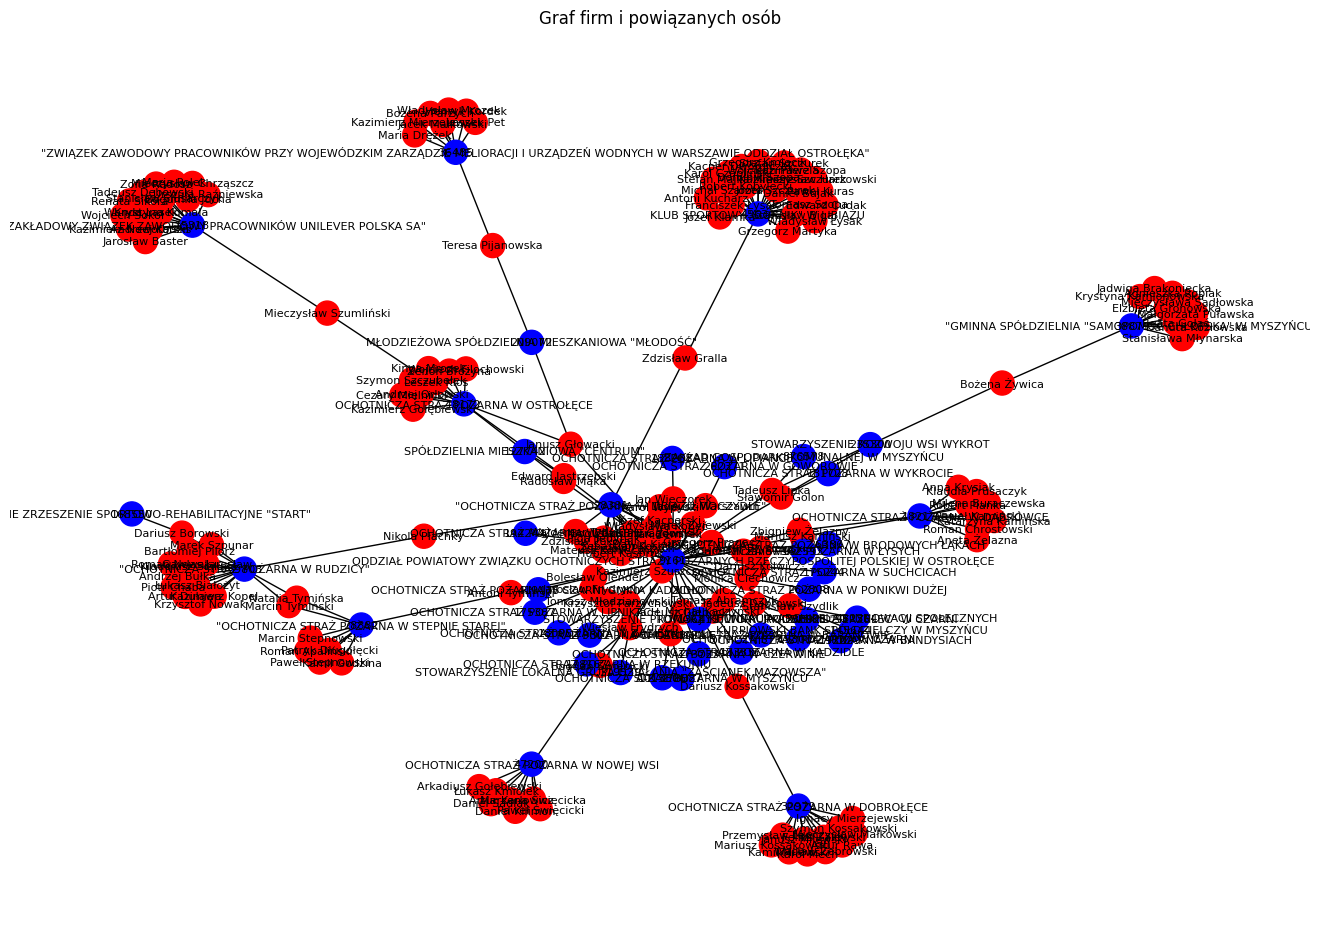

In [56]:
# for subgraph in sorted(nx.connected_components(G), key=len, reverse=True):
#   if 'MOVE ONE RELOCATIONS' in subgraph:
#     subgraph_example = subgraph
#     break

subgraph_example = sorted(nx.connected_components(G), key=len, reverse=True)[2]

graphlet_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print('Size of ten biggest subgraphs:', repr(graphlet_sizes[:10]))

plt.figure(figsize=(13, 9))

H = G.subgraph(subgraph_example)
pos = nx.spring_layout(H)
colors = [H.nodes[node]['color'] for node in H.nodes()]
nx.draw(H, pos, with_labels=False, font_size=8, node_color=colors, font_weight='bold')

labels = {node_id: name for node_id, name in nx.get_node_attributes(H, 'name').items()}
nx.draw_networkx_labels(H, pos, labels=labels, font_size=8, font_color='black')
c_labels = {n: n for n in H.nodes() if H.nodes[n]['color'] == company_color}
nx.draw_networkx_labels(H, pos, labels=c_labels, font_size=8, font_color='black')

plt.title("Graf firm i powiązanych osób")
plt.show()

In [ ]:
def find_largest_community(graph):
  com, modularity = [], []
  for communities in nx.algorithms.community.girvan_newman(graph):
    mod = nx.algorithms.community.modularity(graph, communities)
    com.append(communities)
    modularity.append(mod)
  return com, modularity

def main(graphs):
  for i, graph in enumerate(graphs):
    communities, modularity = find_largest_community(graph)
    for i in range(len(modularity)):
      largest_community = max(communities[i], key=len)
      print('runda:', i+1)
      num_nodes = len(largest_community)
      num_edges = graph.subgraph(largest_community).number_of_edges()
      print(f"Największa społeczność: {largest_community}")
      print(f"Liczba wierzchołków: {num_nodes}")
      print(f"Liczba krawędzi: {num_edges}")
      print("Modularity:", modularity[i])
      print()
  return communities, modularity


# Przykładowe wywołanie funkcji main z listą grafów
graphs = [H]
communities, modularity = main(graphs)


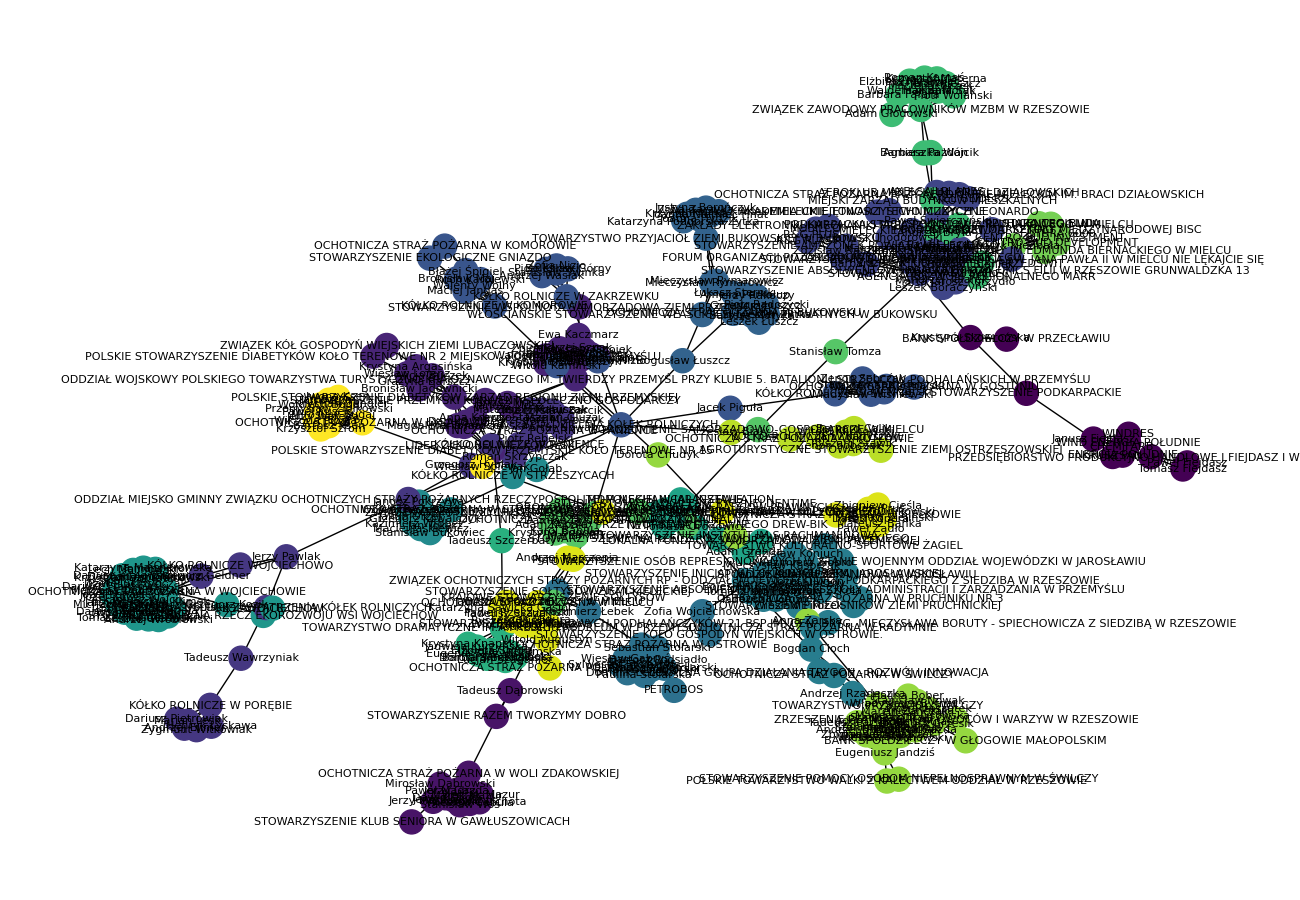

In [ ]:
def draw_community_graph_with_positions(graph, communities, original_positions):
  color_map = {}
  for i, community in enumerate(communities):
    for node in community:
        color_map[node] = i
  plt.figure(figsize=(13, 9))
  nx.draw(graph, pos=original_positions, node_color=[color_map[node] for node in graph.nodes()])
  # nx.draw_networkx_nodes(graph, pos=original_positions, nodelist=[node for node in graph if H.nodes[node]['color'] == company_color], node_color=company_color) # color companies blue
  nx.draw_networkx_labels(H, pos, labels=labels, font_size=8, font_color='black')
  nx.draw_networkx_labels(H, pos, labels=c_labels, font_size=8, font_color='black')
  plt.show()



mod_max = np.argmax(modularity)

draw_community_graph_with_positions(H, communities[mod_max], pos)



### Graphlets finding

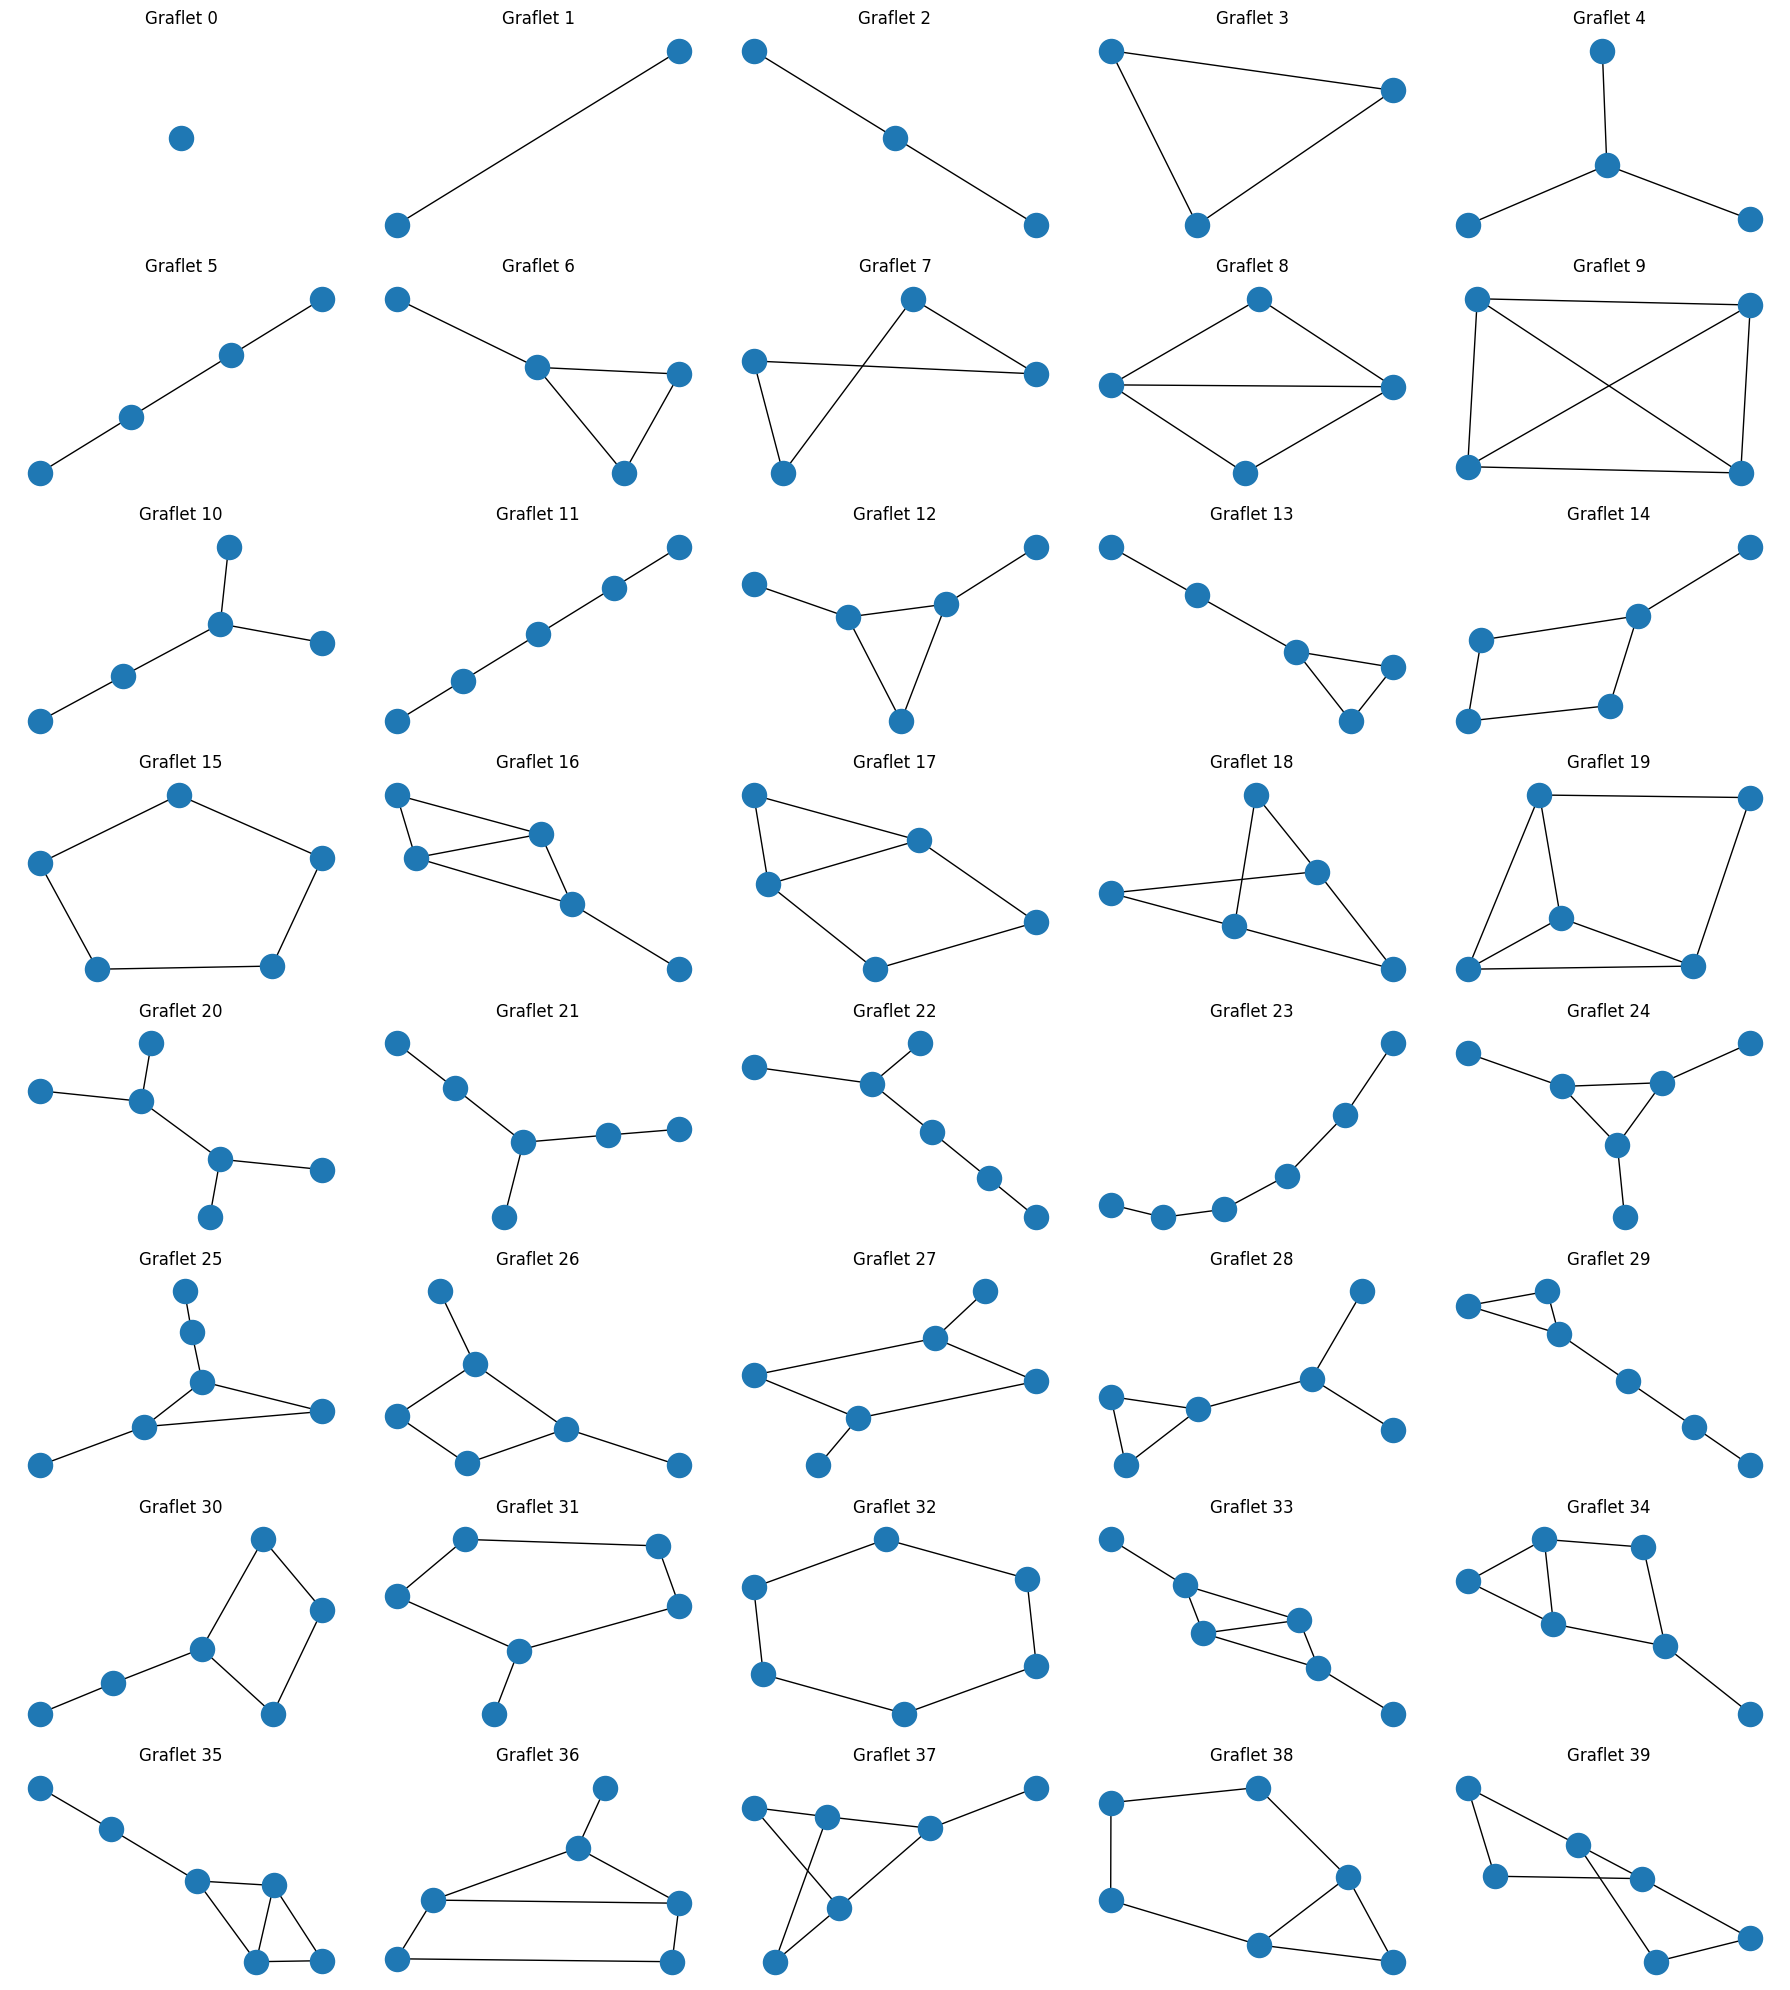

In [ ]:
graphlets = []
for i in range(150):
  g = nx.graph_atlas_g()[i]
  if len([g_p for g_p in nx.connected_components(g)]) == 1:
    degrees = [val for (node, val) in g.degree()]
    if not np.any(np.array(degrees) > 3):
      # plt.figure()
      # pos = nx.spring_layout(g)
      # nx.draw(g, pos=pos)
      # plt.show()
      graphlets.append(g)


fig, axs = plt.subplots(8, 5, figsize=(18, 20))

for i, ax in enumerate(axs.flat):
  nx.draw(graphlets[i], ax=ax)
  ax.set_title(f'Graflet {i}')

fig.tight_layout()
fig.show()

In [ ]:
graphlets_distribution = np.zeros(len(graphlets))
for nodes in nx.connected_components(G):
  subgraph = G.subgraph(nodes)
  for i in range(len(graphlets)):
    if nx.is_isomorphic(graphlets[i], subgraph):
      graphlets_distribution[i] += 1
      break

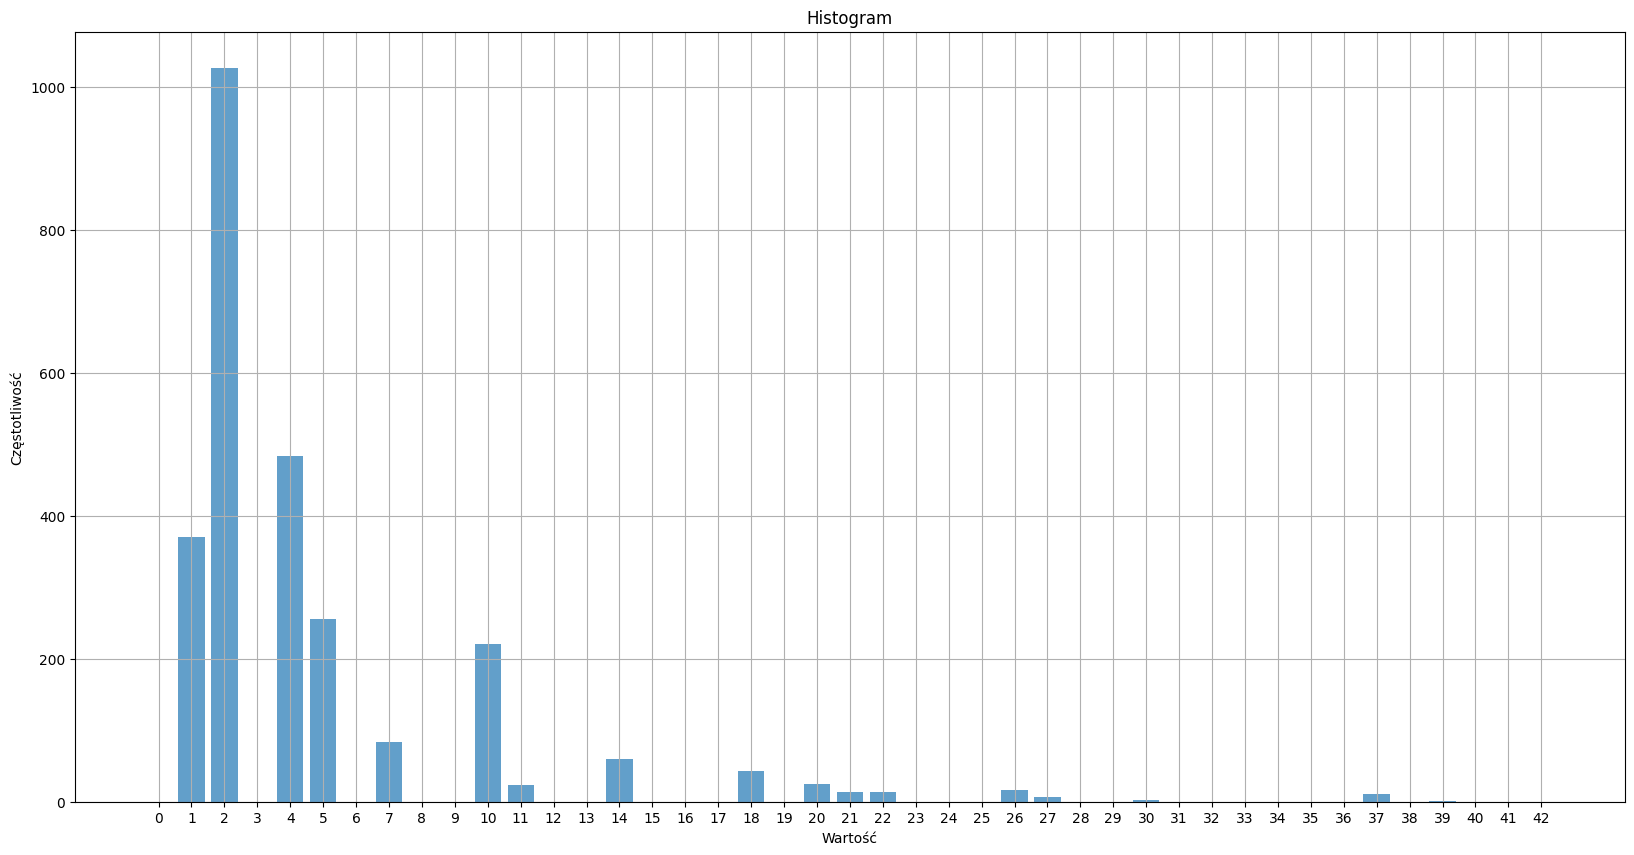

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(graphlets_distribution)), graphlets_distribution, align='center', alpha=0.7)

plt.xticks(range(len(graphlets_distribution)), np.arange(0, len(graphlets_distribution)))
plt.xlabel('Wartość')
plt.ylabel('Częstotliwość')
plt.title('Histogram')
plt.grid(True)
plt.show()

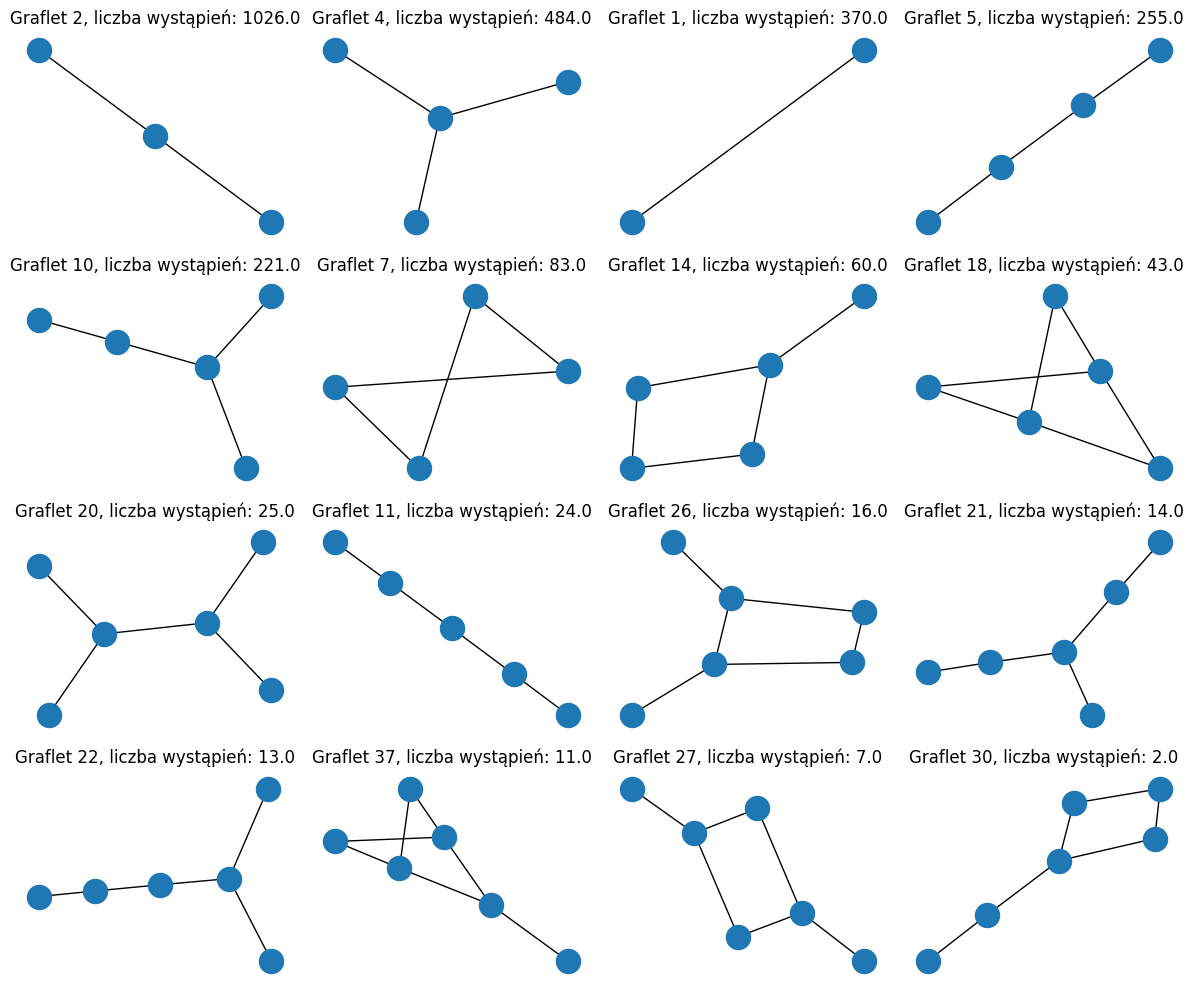

In [ ]:
frequent_graphlets = np.argsort(graphlets_distribution)[::-1]

# g = graphlets[14]
# plt.figure()
# pos = nx.spring_layout(g)
# nx.draw(g, pos=pos)
# plt.show()
# graphlets.append(g)

fig, axs = plt.subplots(4, 4, figsize=(12, 10))


for i, ax in enumerate(axs.flat):
  nx.draw(graphlets[frequent_graphlets[i]], ax=ax)
  ax.set_title(f'Graflet {frequent_graphlets[i]}, liczba wystąpień: {graphlets_distribution[frequent_graphlets[i]]}')

fig.tight_layout()
fig.show()

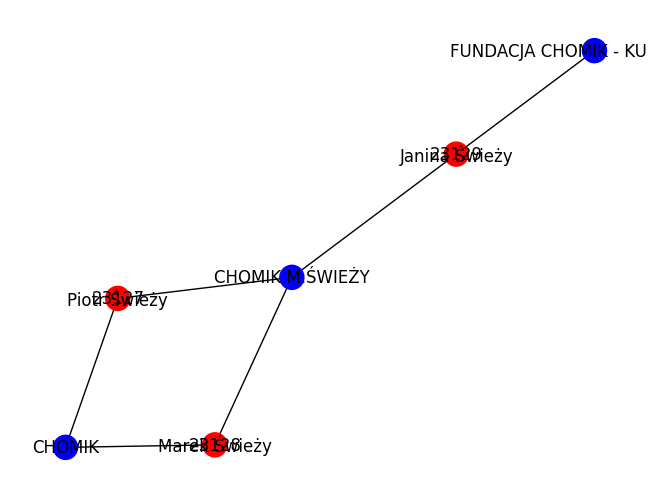

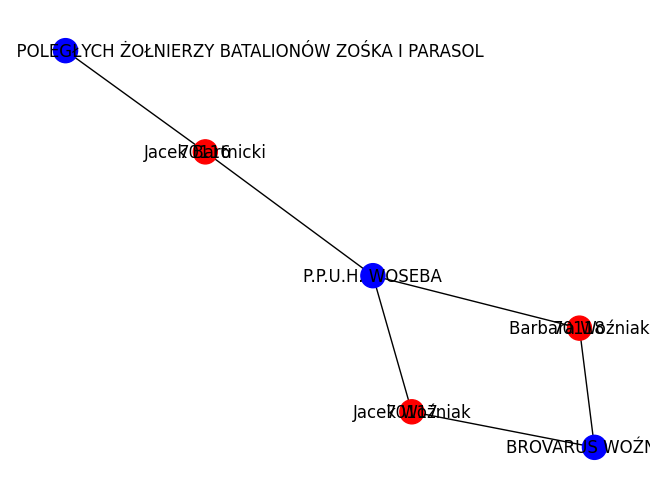

In [ ]:
index = 30 # change index to plot others graphlets examples

graphlet_to_find = graphlets[index]

graphlet_examples = []
for nodes in nx.connected_components(G):
  subgraph = G.subgraph(nodes)
  if nx.is_isomorphic(graphlet_to_find, subgraph):
    graphlet_examples.append(subgraph)
    if len(graphlet_examples) == 3:
      break

if len(graphlet_examples) > 0:
  for graphlet_example in graphlet_examples:
    plt.figure()
    colors = [graphlet_example.nodes[node]['color'] for node in graphlet_example.nodes()]
    pos = nx.spring_layout(graphlet_example)
    nx.draw(graphlet_example, pos, with_labels=True, node_color=colors)
    labels = {node_id: name for node_id, name in nx.get_node_attributes(graphlet_example, 'name').items()}
    nx.draw_networkx_labels(graphlet_example, pos, labels=labels, font_size=12, font_color='black')
    plt.show()
else:
  print("No isomorphic subgraph found")

## Company - company graph

In [ ]:
S = nx.Graph()

In [ ]:
for index, row in df.iterrows():
  if pd.isna(row[2]):
    continue
  companies = []
  companies.append(row[0])
  related_companies = [company.strip() for company in row[2].split(',')]
  companies = companies + related_companies
  for i, company in enumerate(companies):
    for c in companies[i+1:]:
      if company == c:
        continue
      if not S.has_edge(company, c):
        S.add_edge(company, c, person_id=index, name=row[1], weight=1)
      else:
        S[company][c]['weight'] += 1
      # S.add_edge(company, c, person_id=index, name=row[1], weight=S.get_edge_data(company, c, default={'weight': 0})['weight'] + 1)

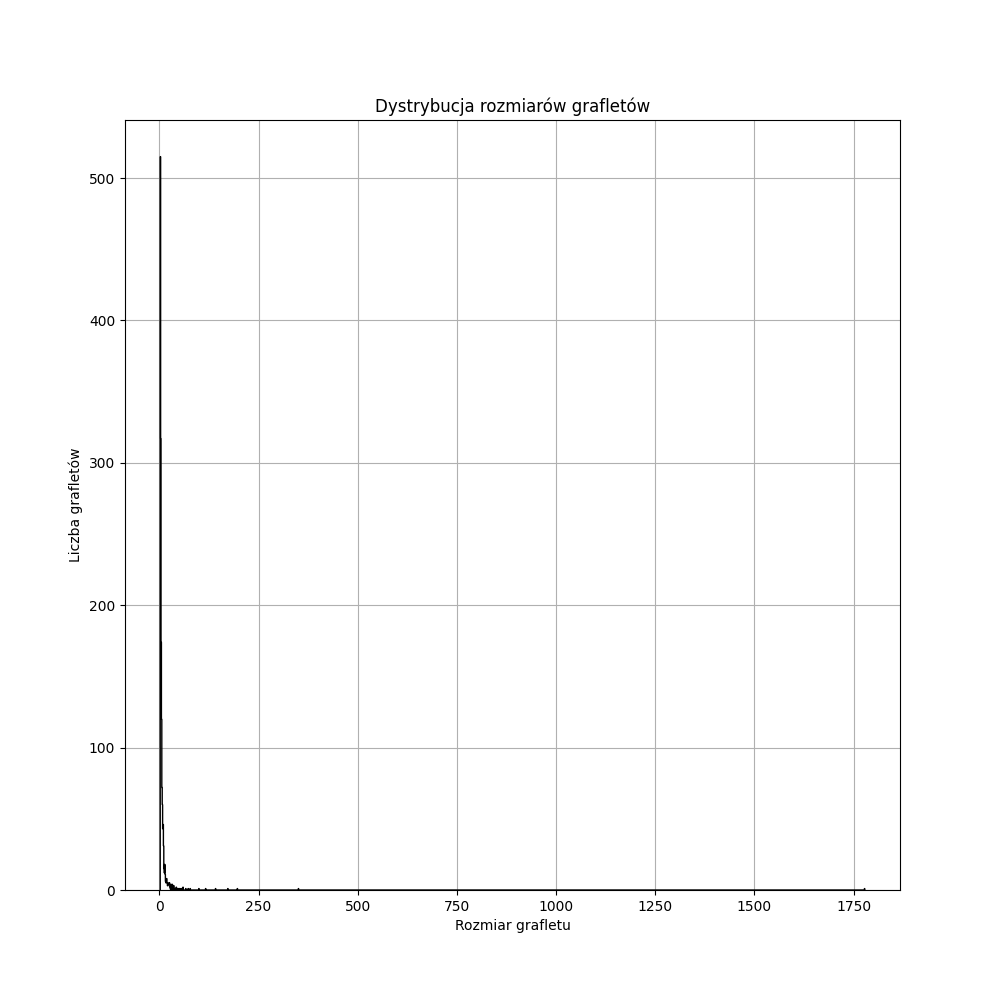

In [ ]:
# Zliczanie rozmiarów grafletów
graphlet_sizes_S = [len(c) for c in sorted(nx.connected_components(S), key=len, reverse=True)]

# Tworzenie histogramu
plt.figure(figsize=(10, 10))
plt.hist(graphlet_sizes_S, bins=range(min(graphlet_sizes_S), max(graphlet_sizes_S) + 1, 1), edgecolor='black', histtype='step')
plt.xlabel('Rozmiar grafletu')
plt.ylabel('Liczba grafletów')
plt.title('Dystrybucja rozmiarów grafletów')
plt.grid(True)
plt.show()

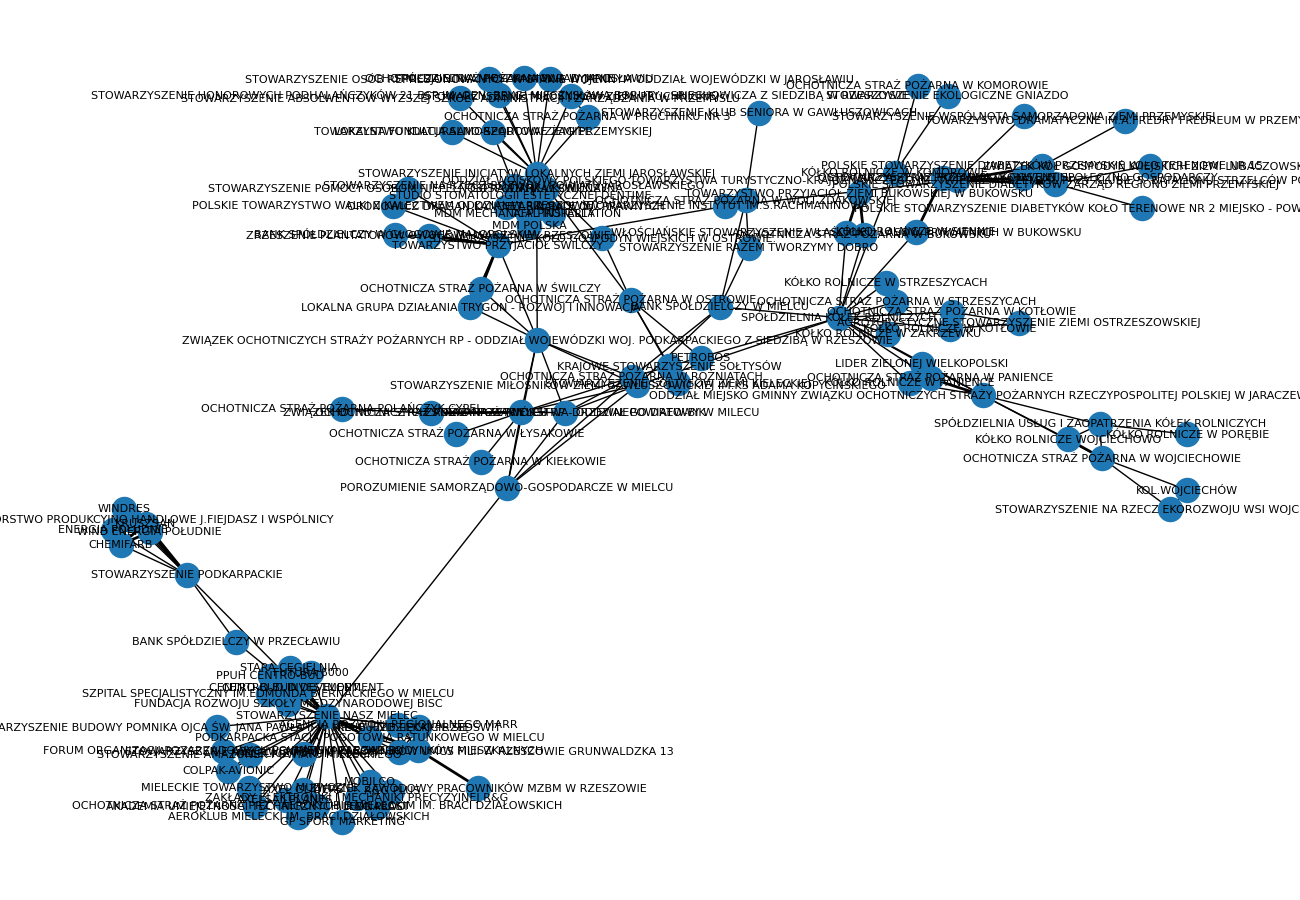

In [ ]:
# for subgraph in sorted(nx.connected_components(S), key=len, reverse=True):
#   if 'STOWARZYSZENIE RAZEM DLA TARCHAŁ WIELKICH I OKOLICY' in subgraph:
#     subgraph_example = subgraph
#     break

subgraph_example_c = sorted(nx.connected_components(S), key=len, reverse=True)[5]
plt.figure(figsize=(13, 9))

H_C = S.subgraph(subgraph_example_c)
pos = nx.spring_layout(H_C)
weights = [d['weight'] for u, v, d in H_C.edges(data=True)]
# colors = [H_S.nodes[node]['color'] for node in H_S.nodes()]
nx.draw(H_C, pos, with_labels=True, font_size=8, font_color='black', width=weights)

# labels = {node_id: name for node_id, name in nx.get_node_attributes(H, 'name').items()}
# nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_color='black')

plt.title("Graf firm i powiązanych osób")
plt.show()

Graf 1:
Największe kliki:
Liczba wierzchołków: 9, Liczba krawędzi: 36, Klika: ['MDM POLSKA', 'AFP PROPERTY', 'MDM MECHANICAL INSTALLATION', 'GOSPODARKA KOMUNALNA', 'STOWARZYSZENIE INICJATYW LOKALNYCH ZIEMI JAROSŁAWSKIEJ', 'STOWARZYSZENIE NA RZECZ ROZWOJU POWIATU JAROSŁAWSKIEGO', 'ORONOWICZ DRAGAN KANCELARIA RADCÓW PRAWNYCH', 'STUDIO STOMATOLOGII ESTETYCZNEJ DENTIME', 'NET-FINANCE']


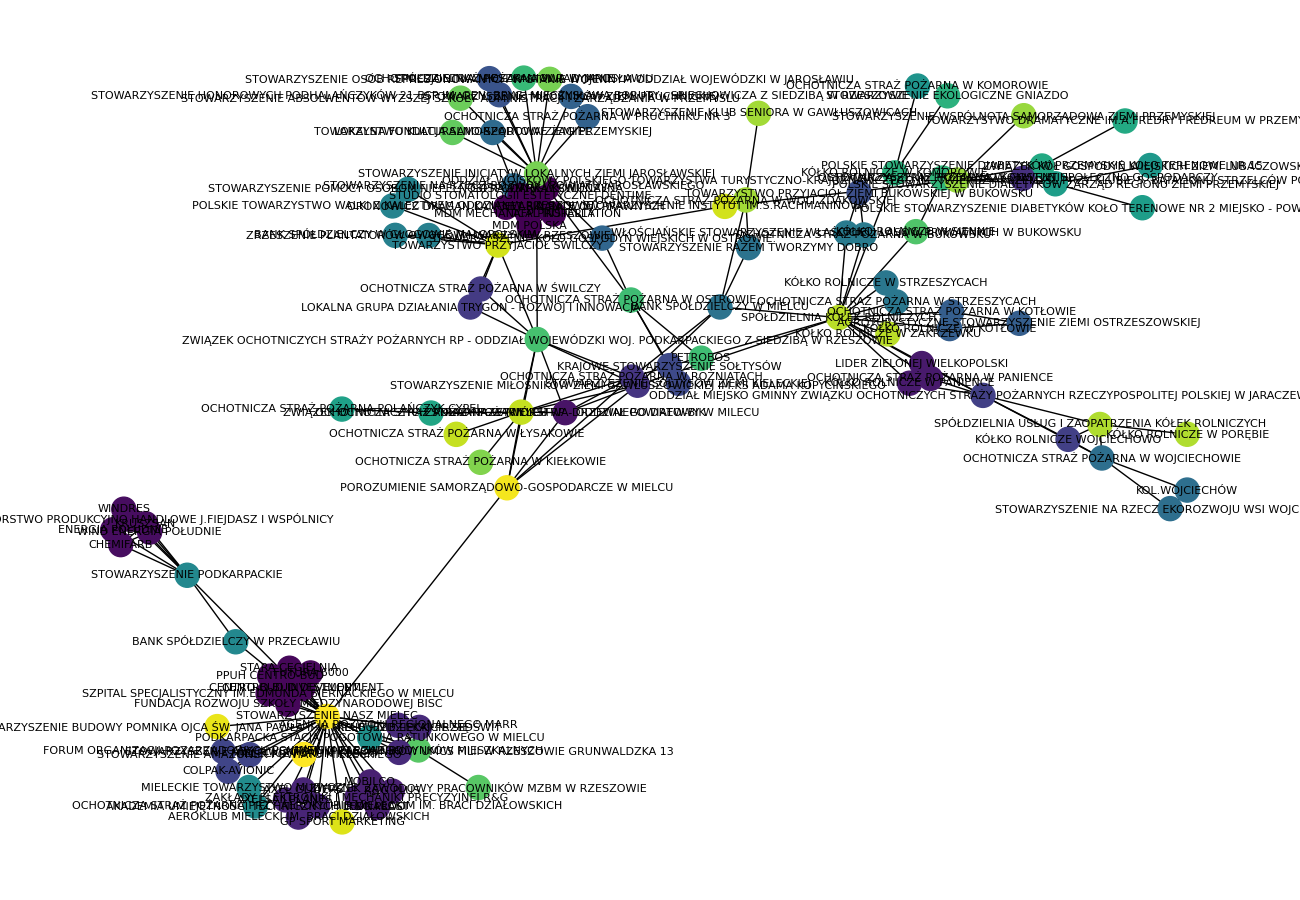

In [ ]:
def find_cliques(graph):
    cliques = list(nx.find_cliques(graph))
    cliques.sort(key=lambda x: len(x), reverse=True)
    return cliques

def main(graphs):
    for i, graph in enumerate(graphs):
        print(f"Graf {i+1}:")
        cliques = find_cliques(graph)
        print("Największe kliki:")

        subgraph = graph.subgraph(cliques[0])
        num_nodes = subgraph.number_of_nodes()
        num_edges = subgraph.number_of_edges()
        print(f"Liczba wierzchołków: {num_nodes}, Liczba krawędzi: {num_edges}, Klika: {cliques[0]}")
        return cliques

graphs = [H_C]
cliques = main(graphs)

def draw_cliquess(graph, communities, original_positions):
  color_map = {}
  for i, community in enumerate(communities):
    for node in community:
        color_map[node] = i
  plt.figure(figsize=(13, 9))
  nx.draw(graph, pos=original_positions, node_color=[color_map[node] for node in graph.nodes()])
  nx.draw_networkx_labels(H, pos, labels=c_labels, font_size=8, font_color='black')
  plt.show()
draw_cliquess(H_C, cliques, pos)

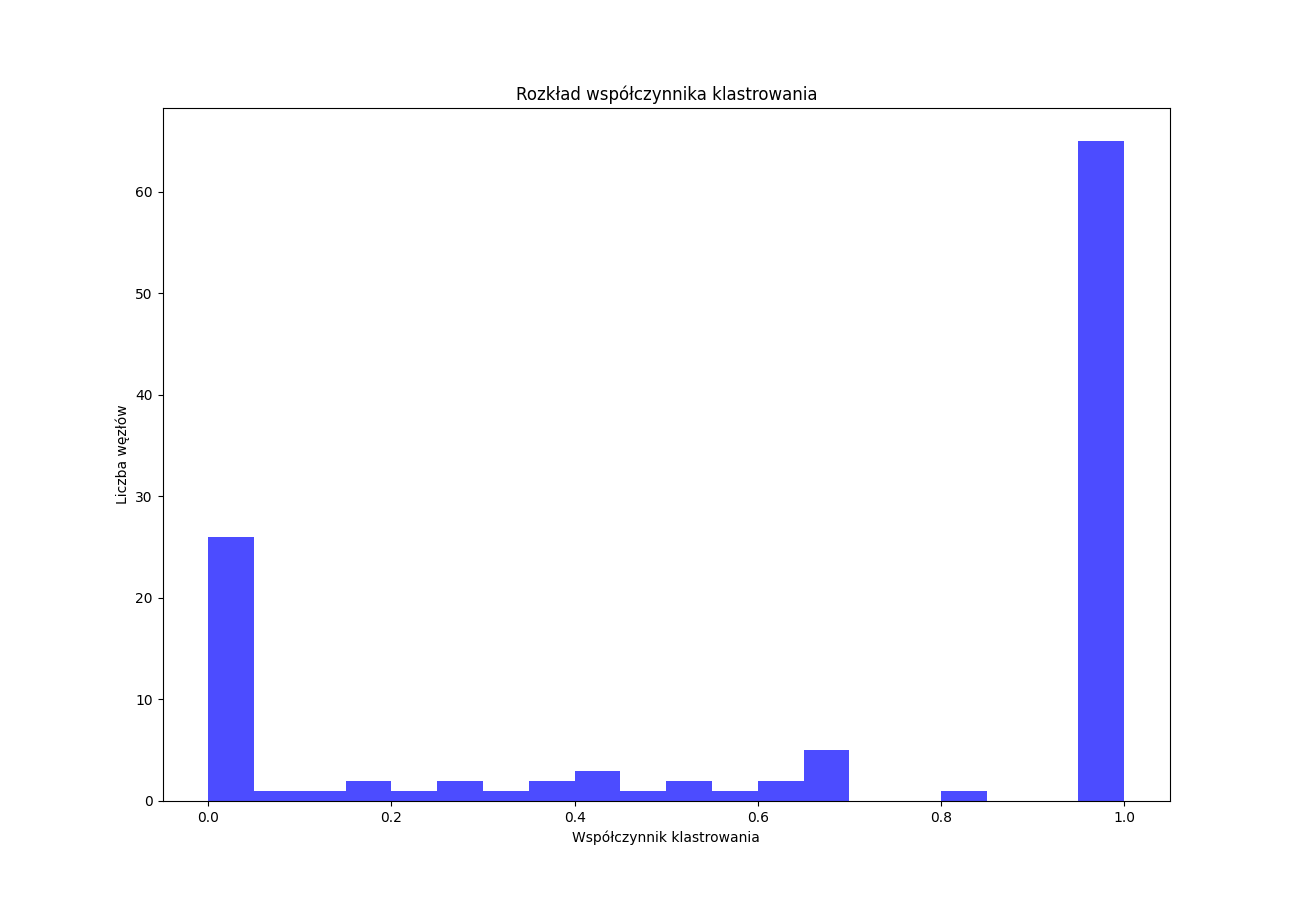

In [ ]:
clustering_coefficients = nx.clustering(H_C)
plt.figure(figsize=(13, 9))
plt.hist(list(clustering_coefficients.values()), bins=20, alpha=0.7, color='b')
plt.title('Rozkład współczynnika klastrowania')
plt.xlabel('Współczynnik klastrowania')
plt.ylabel('Liczba węzłów')
plt.show()

In [ ]:
# plt.figure(figsize=(13, 9))
# nx.draw(H_C, pos, with_labels=True, font_size=10, font_weight='bold', font_color='red', width=weights)
# plt.show()

In [ ]:
# plt.figure(figsize=(13, 9))
# nx.draw(H_C, pos, with_labels=True, font_size=10, font_weight='bold', font_color='red')
# plt.show()

In [ ]:
# !sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
# !pip install pygraphviz

In [ ]:
# import pygraphviz as pgv
# agraph = nx.nx_agraph.to_agraph(H_C)

# agraph.layout(prog='dot')
# agraph.draw('graph.png', format='png')

## Person - Person graph

In [ ]:
from itertools import combinations

def nodes_to_edges(graph, nodes):

  for node in nodes:
    neighbors = list(combinations(graph.neighbors(node), 2))
    graph.remove_node(node)
    if neighbors == []:
      continue

    graph.add_edges_from(neighbors)

  return graph

In [ ]:
X = H.copy()
companies = [node for node in H.nodes() if H.nodes[node]['color'] == company_color]
P = nodes_to_edges(X, companies)



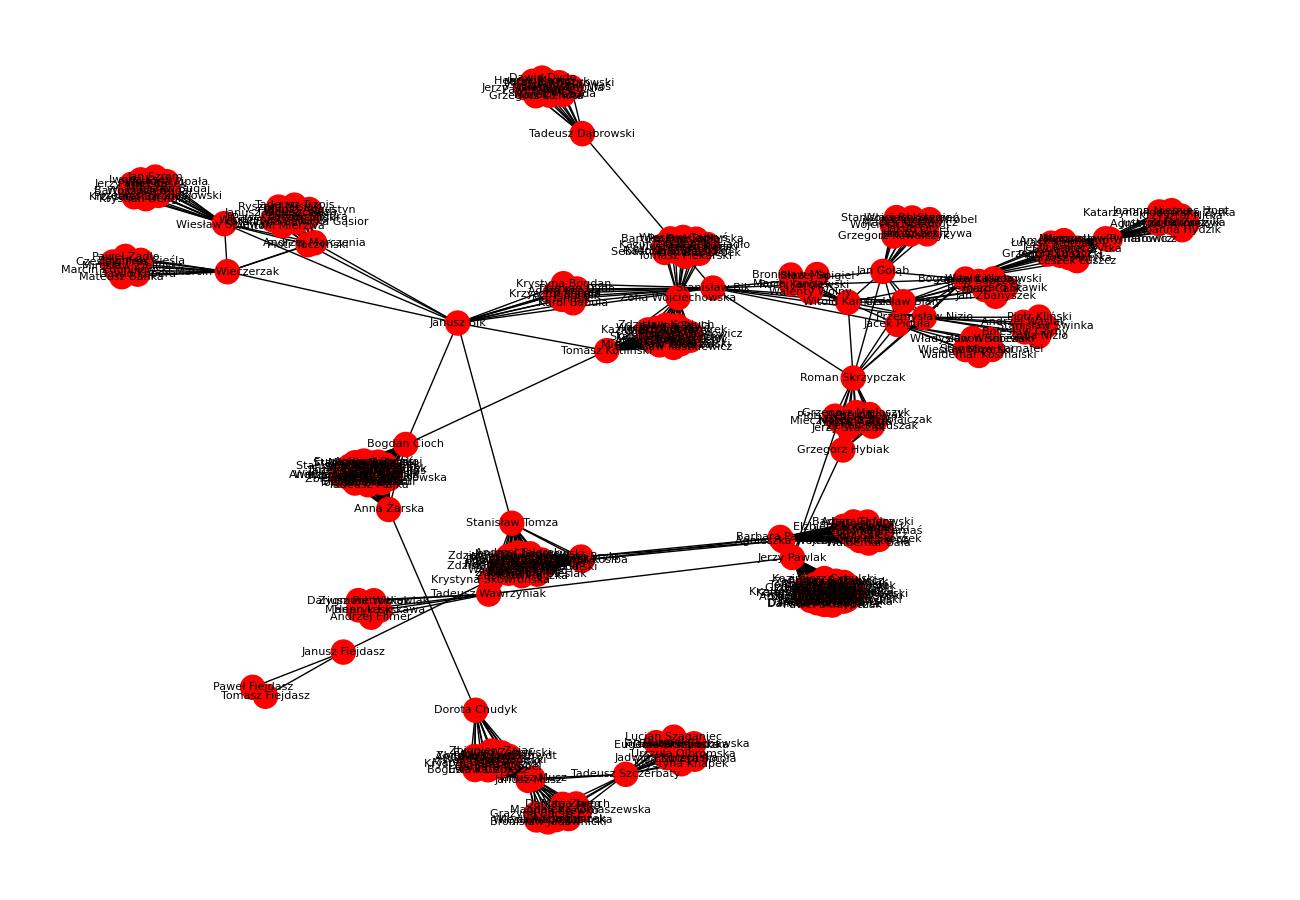

In [ ]:
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(P)
p_labels = {node: P.nodes[node]['name'] for node in P.nodes()}
p_colors = [P.nodes[node]['color'] for node in P.nodes()]
nx.draw(P, pos, with_labels=False, node_color=p_colors)
nx.draw_networkx_labels(H, pos, labels=p_labels, font_size=8, font_color='black')
plt.show()

# TODO
Przekształcić graf osoba - spółka na osoba - osoba
kliki
społeczności
rozkład cluster coefficient